In [85]:
import pandas as pd
import warnings as w

In [86]:
# to ignore the warnings
w.filterwarnings('ignore')

In [87]:
# reading the file using pandas into a data frame by giving the required column names
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df=pd.read_csv('C:/Users/91810/Downloads/u.data',sep='\t',names=column_names)
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [88]:
# user_id is the id of the user who watched a particular movie
# item_id is the movie id
# rating is the rating given by the person with some user_id to the item_id(movie) respectievely (out of 5)

In [89]:
df.shape

(100000, 4)

In [90]:
# to know how many unique user ids available
df['user_id'].nunique()

943

In [91]:
# to know how many unique movies available
df['item_id'].nunique()

1682

In [92]:
# inorder to understand which item_id refers to which movie we need to read another file
movie_titles=pd.read_csv('C:/Users/91810/Downloads/u.item',sep='\|',header=None)
movie_titles.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [93]:
# we only wanted item_id and its corresponding movie_name so in the above dataframe we need to extract column 0 and 1 for that 
movie_titles=movie_titles[[0,1]]
movie_titles.columns=['item_id','movie_name']
movie_titles.head()

,item_id,movie_name
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [94]:
# Inorder to add movie_name corresponding to the item_id in df we have a merge option in pandas to do it.
df=pd.merge(df,movie_titles,on='item_id')
df

,user_id,item_id,rating,timestamp,movie_name
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
...,...,...,...,...,...
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [95]:
#dropping timestamp column as there is no use of that column in this project.
df.drop('timestamp',axis=1,inplace=True)
df

,user_id,item_id,rating,movie_name
0,196,242,3,Kolya (1996)
1,63,242,3,Kolya (1996)
2,226,242,5,Kolya (1996)
3,154,242,3,Kolya (1996)
4,306,242,5,Kolya (1996)
...,...,...,...,...
99995,840,1674,4,Mamma Roma (1962)
99996,655,1640,3,"Eighth Day, The (1996)"
99997,655,1637,3,Girls Town (1996)
99998,655,1630,3,"Silence of the Palace, The (Saimt el Qusur) (1..."


### Exploratory Data Analysis

In [96]:
import matplotlib.pyplot as plt

In [97]:
# we need to find the average rating of any movie
df.groupby('movie_name').mean()['rating'].sort_values(ascending=False).head()

movie_name
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [98]:
# 5.0 rating doesn't mean that it is the best movie because the rating is influenced by another parameter
# that is the number of ratings given to that movie 
# inorder to find how many no.of ratings given to a particular movie can be known by count function after grouping of movies.
df.groupby('movie_name').count()['rating'].sort_values(ascending=False).head()

movie_name
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [124]:
# Creating final DataFrame with movie title, average_rating  and no. of ratings of that movie
ratings=pd.DataFrame(df.groupby('movie_name').mean()['rating'])

In [125]:
ratings.head()

,rating
movie_name,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [126]:
# adding number of ratings column in ratings DataFrame
ratings['no_of_ratings']= pd.DataFrame(df.groupby('movie_name').count()['rating'])

In [127]:
ratings

,rating,no_of_ratings
movie_name,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [128]:
ratings.sort_values(by = 'rating', ascending = False)

,rating,no_of_ratings
movie_name,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


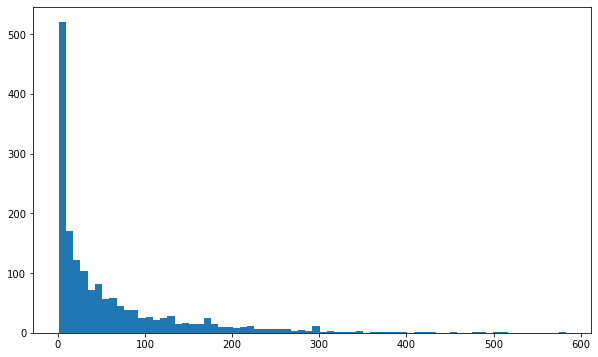

In [103]:
# To visualize the number of ratings using histogram
plt.figure(figsize = (10, 6))
plt.hist(ratings['no_of_ratings'], bins= 70)
plt.show()
# x_axis is the number of ratings 
# y_axis is how many times those ratings under binsize appears in the dataset

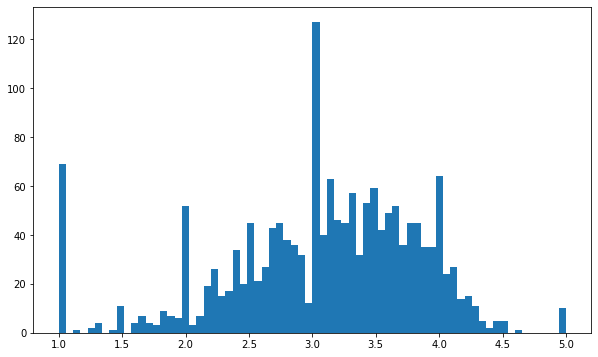

In [104]:
# Similarly as above to visualize the rating we plot histogram for average rating
plt.figure(figsize = (10, 6))
plt.hist(ratings['rating'],bins=70)
plt.show()

### Creating Movie Recomendation

In [105]:
df.head()

,user_id,item_id,rating,movie_name
0,196,242,3,Kolya (1996)
1,63,242,3,Kolya (1996)
2,226,242,5,Kolya (1996)
3,154,242,3,Kolya (1996)
4,306,242,5,Kolya (1996)


In [106]:
# Creating Pivot table with user_id as indexes, movie_titles as columns and ratings as values
# we use pivot table in pandas for that 
moviemat = df.pivot_table(index = 'user_id', columns = 'movie_name', values = 'rating')
moviemat.head()

movie_name,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,� k�ldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [107]:
# Sorting ratings dataframe with respect to number of ratings 
ratings.sort_values('no_of_ratings',ascending=False).head()

,rating,no_of_ratings
movie_name,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [108]:
starwars_user_ratings = moviemat['Star Wars (1977)']
starwars_user_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [109]:
# Finding correation of starwars with other movies 
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_starwars

movie_name
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
� k�ldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [110]:
# converting above series into a dataframe
corr_starwars = pd.DataFrame(similar_to_starwars, columns = ['correlation'])

In [111]:
# removing movies which has not any viewers who viewed starwars to do that we need to drop nan values in correlation column
corr_starwars = corr_starwars.dropna()

In [112]:
corr_starwars.head()

,correlation
movie_name,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [113]:
corr_starwars.sort_values('correlation', ascending = False, inplace = True)
# This might have 1.0 correlation because if any other movie has 5 ratings than we cannot decide its correlation because of 
# less number of ratings. So we need to somehow filter the correlation values on some threshold value of num of ratings"

In [114]:
corr_starwars.head()

,correlation
movie_name,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0


In [115]:
# adding a column of num of ratings to the corr_starwars data frame
corr_starwars = corr_starwars.join(ratings['no_of_ratings'])

In [116]:
corr_starwars.head()

,correlation,no_of_ratings
movie_name,,
Hollow Reed (1996),1.0,6
Commandments (1997),1.0,3
Cosi (1996),1.0,4
No Escape (1994),1.0,5
Stripes (1981),1.0,5


In [117]:
# filtering correlation values such that number of reviews are > than 100 and sorting them in descending order of correlation 
recommendations = corr_starwars[corr_starwars['no_of_ratings']>100].sort_values('correlation', ascending = False)

In [118]:
# to recommend the top 10 movies for those who liked starwars movie
recommendations[1:11]

,correlation,no_of_ratings
movie_name,,
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115
L.A. Confidential (1997),0.319065,297


### TO Predict Movies Based On User Input

In [119]:
def predict_movies(movie_name):
    movie_user_ratings = moviemat[movie_name]
    similar_to_movie = moviemat.corrwith(movie_user_ratings)
    corr_movie = pd.DataFrame(similar_to_movie, columns = ['correlation'])
    corr_movie = corr_movie.dropna()
    corr_movie.sort_values('correlation', ascending = False, inplace = True)
    corr_movie = corr_movie.join(ratings['no_of_ratings'])
    recommendations = corr_movie[corr_movie['no_of_ratings']>100].sort_values('correlation', ascending = False)
    return recommendations

In [120]:
# recommendations for movies similar to Starwars
predictions_on_starwars = predict_movies('Star Wars (1977)')
predictions_on_starwars.head()

,correlation,no_of_ratings
movie_name,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [122]:
# REcommendations on movies similar to titanic
predictions_on_titanic = predict_movies('Titanic (1997)')
predictions_on_titanic.head()

,correlation,no_of_ratings
movie_name,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208
